In [1]:
import pickle

import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import cleaning_functions as clean

In [2]:
train_df = pd.read_csv('Code_challenge_train.csv')
test_df = pd.read_csv('Code_challenge_test.csv')

In [3]:
train_df = clean.cleaning(train_df)

In [4]:
test_df = clean.cleaning(test_df)

In [6]:
X = train_df.drop(['y'], axis = 1)
y = train_df['y']

**predicting from the first saved model. it was Support Victor Machine Classifier**

In [7]:
# load the saved SVM model
model_1_svc = pickle.load(open('model_1_svc.sav', 'rb'))

In [8]:
# predicting on the hold-out set
results_1 = model_1_svc.predict_proba(test_df)[:,1]
print(results_1)

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[1.53137415e-02 2.89409608e-04 4.66431509e-03 ... 1.23553230e-04
 9.11889728e-01 9.79952738e-01]


In [10]:
# convert to data frame
results_1 = pd.DataFrame(results_1, columns = ['1'])

In [13]:
# saving predictions
results_1.to_csv('results1.csv', header = '1', index = False)

**Scoring and evaluating the first model: SVM**

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# get classes and probabilities predictions for the validation set, so to score
preds_1 = model_1_svc.predict(X_test) 
preds_1_probs = model_1_svc.predict_proba(X_test)[:,1]

In [29]:
# just so we have the counts of False Positives and False Negatives, to those true ones
# for the first model
cm_1 = pd.DataFrame(confusion_matrix(y_test, preds_1), columns = ['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
cm_1

,Predicted 0,Predicted 1
Actual 0,7922,48
Actual 1,87,1943


In [30]:
# scores
print(f"AUC score: {roc_auc_score(y_test, preds_1).round(3)}")
print(f"f1-score: {f1_score(y_test, preds_1).round(3)}")

AUC score: 0.976
f1-score: 0.966


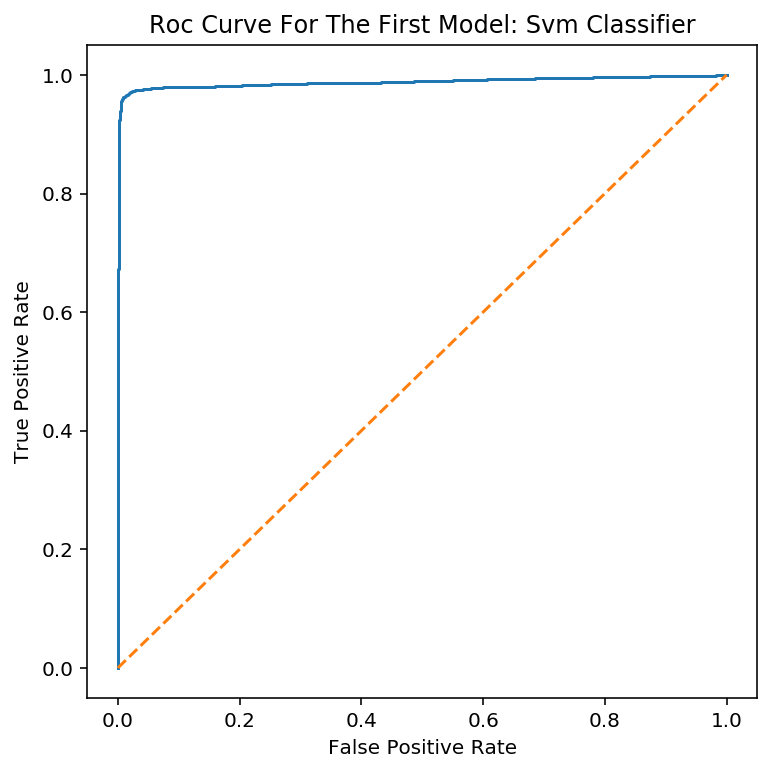

In [31]:
# roc-curve for the first model to visualize 
fpr, tpr, _ = roc_curve(y_test, preds_1_probs)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_test)],[0, max(y_test)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the first model: SVM classifier'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());

***
**predicting from the second saved model. It was a neural network**

In [11]:
import pickle
model_2_nn = pickle.load(open('model_2_nn.sav', 'rb'))

In [31]:
results_2 = model_2_nn.predict_proba(test_df, batch_size=512)

In [38]:
pd.DataFrame(results_2).sample(10)

,0
4316,0.155588
3028,1.000000
6548,0.000000
1971,1.000000
1685,1.000000
3123,1.000000
8397,0.992411
1759,1.000000
1205,0.000000
5305,0.000000


In [41]:
results_2 = pd.DataFrame(results_2, columns = ['1'])

In [43]:
results_2.to_csv('results2.csv', header = '1', index = False)

***
**Scoring and evaluating neural networks model**

In [51]:
results_2 = pd.read_csv('results2.csv')

In [23]:
from sklearn.model_selection import train_test_split

X = train_df.drop('y', axis = 1)
y = train_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 72019)

In [57]:
preds_2 = model_2_nn.predict_classes(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [76]:
preds_2_probs = model_2_nn.predict_proba(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [63]:
# for the second model
cm_2 = pd.DataFrame(confusion_matrix(y_test, preds_2), columns = ['predicted 0', 'predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
cm_2

,predicted 0,predicted 1
Actual 0,5189,2781
Actual 1,686,1344


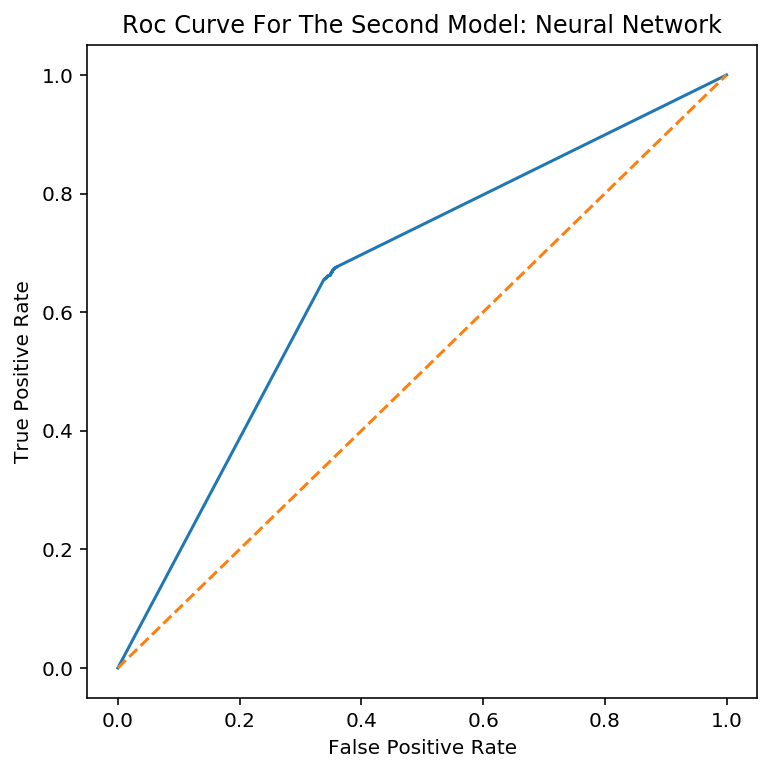

In [92]:
# roc-curve and auc score for the second model
fpr, tpr, _ = roc_curve(y_test, preds_2_probs)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_test)],[0, max(y_test)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the second model: Neural network'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());

In [89]:
# auc scores
# for the first model
print(f"SVM: {roc_auc_score(y_test, preds_1).round(3)}")

# and the second
print(f"NN: {roc_auc_score(y_test, preds_2).round(3)}")

SVM: 0.963
NN: 0.657


In [91]:
# f-1 scores
print(f"SVM: {f1_score(y_test, preds_1).round(3)}")
print(f"NN: {f1_score(y_test, preds_2).round(3)}")

SVM: 0.957
NN: 0.437


An epic failure for the neural network model. I will go back to the drawing board, and focus on the other machine learning model that did second best to SVC

In [93]:
%ls

Code Challenge Instructions.docx* cleaning_functions.py
Code_challenge_test.csv*          initial_building_up.ipynb
Code_challenge_train.csv*         model_1_svc.sav
EDA.ipynb                         model_2_nn.sav
Modeling_part_1.ipynb             predicting_scoring.ipynb
Modeling_part_2.ipynb             results1.csv
__pycache__/                      results2.csv


In [94]:
%rm results2.csv
%rm model_2_nn.sav

***
**Repeating the process for the XGBoost model**

In [33]:
model_2_xgboost = pickle.load(open('model_2_xgboost.sav', 'rb'))
results_2 = model_2_xgboost.predict_proba(test_df)[:,1]

In [34]:
# evaluating the xgboost model
preds_2 = model_2_xgboost.predict(X_test)
preds_2_probs = model_2_xgboost.predict_proba(X_test)

In [35]:
cm_2 = pd.DataFrame(confusion_matrix(y_test, preds_2), columns = ['Predicted 0', 'Predicted 1'], 
            index = ['Actual 0', 'Actual 1'])
cm_2

,Predicted 0,Predicted 1
Actual 0,7910,60
Actual 1,240,1790


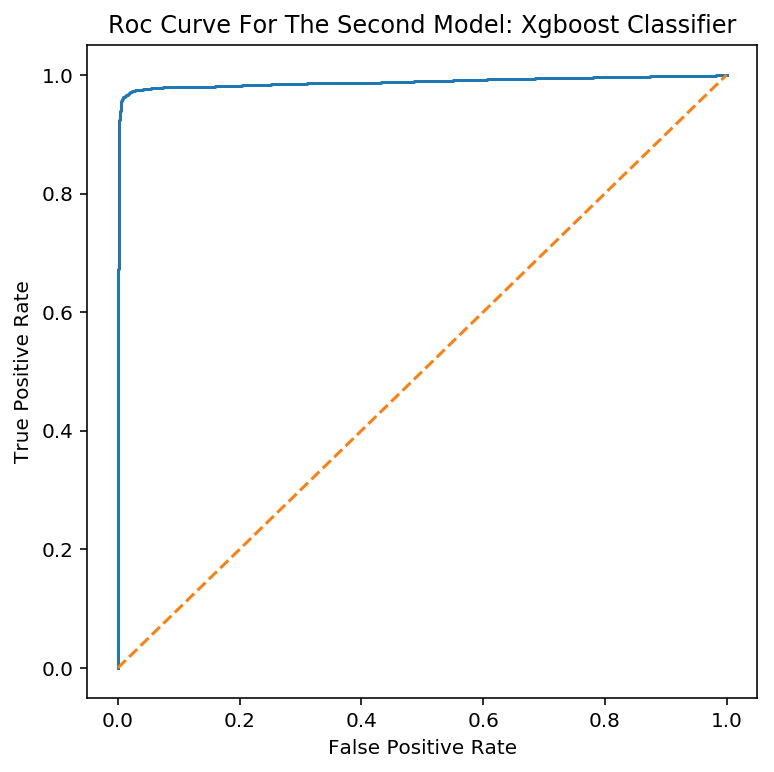

In [36]:
# roc-curve and auc score for the first model
fpr, tpr, _ = roc_curve(y_test, preds_1_probs)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_test)],[0, max(y_test)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the second model: XGBoost classifier'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());

In [37]:
# auc scores comparison
# for the first model
print(f"SVM: {roc_auc_score(y_test, preds_1).round(3)}")

# and the second
print(f"XGBoost: {roc_auc_score(y_test, preds_2).round(3)}")

SVM: 0.976
XGBoost: 0.937


In [38]:
# f-1 scores comparison
print(f"SVM: {f1_score(y_test, preds_1).round(3)}")
print(f"XGBoost: {f1_score(y_test, preds_2).round(3)}")

SVM: 0.966
XGBoost: 0.923


***

In [114]:
# saving the results of the XGBoost model
pd.DataFrame(results_2, columns = ['1']).to_csv('results2.csv', header = '1', index = False)

In [120]:
pd.read_csv('results2.csv').sample(10)

,1
5829,0.000923
462,0.996085
2714,0.000657
2152,0.265746
9681,0.035444
1647,0.000339
8232,0.026412
9010,0.002754
965,0.001799
304,0.999118
